In [2]:
#Loading the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage

In [3]:
#Import Data

df = pd.read_csv('bank_marketing_part1_Data.csv')

## EDA

In [4]:
df.shape

(210, 7)

Dataset contains 210 rows and 7 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [15]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


#### Check for missing values

In [9]:
print("No. of missing rows:\n")
print(df.isnull().sum())

No. of missing rows:

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64


No Null values are present

#### Check for duplicate values

In [12]:
print("No. of duplicate rows: ",df.duplicated().sum())

No. of duplicate rows:  0


No duplicate records are present in the dataset

## Univariate Analysis

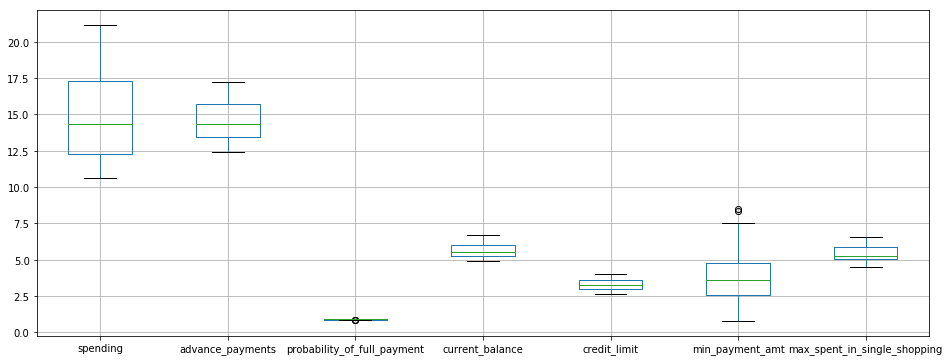

In [14]:
plt.figure(figsize=(16,6))
df.boxplot()

Only min_pament_amt and probabilit of full payment have very few outliers which are also not very significant. Therefore, we can ignore these for now. 

## Bi-Variate Analysis

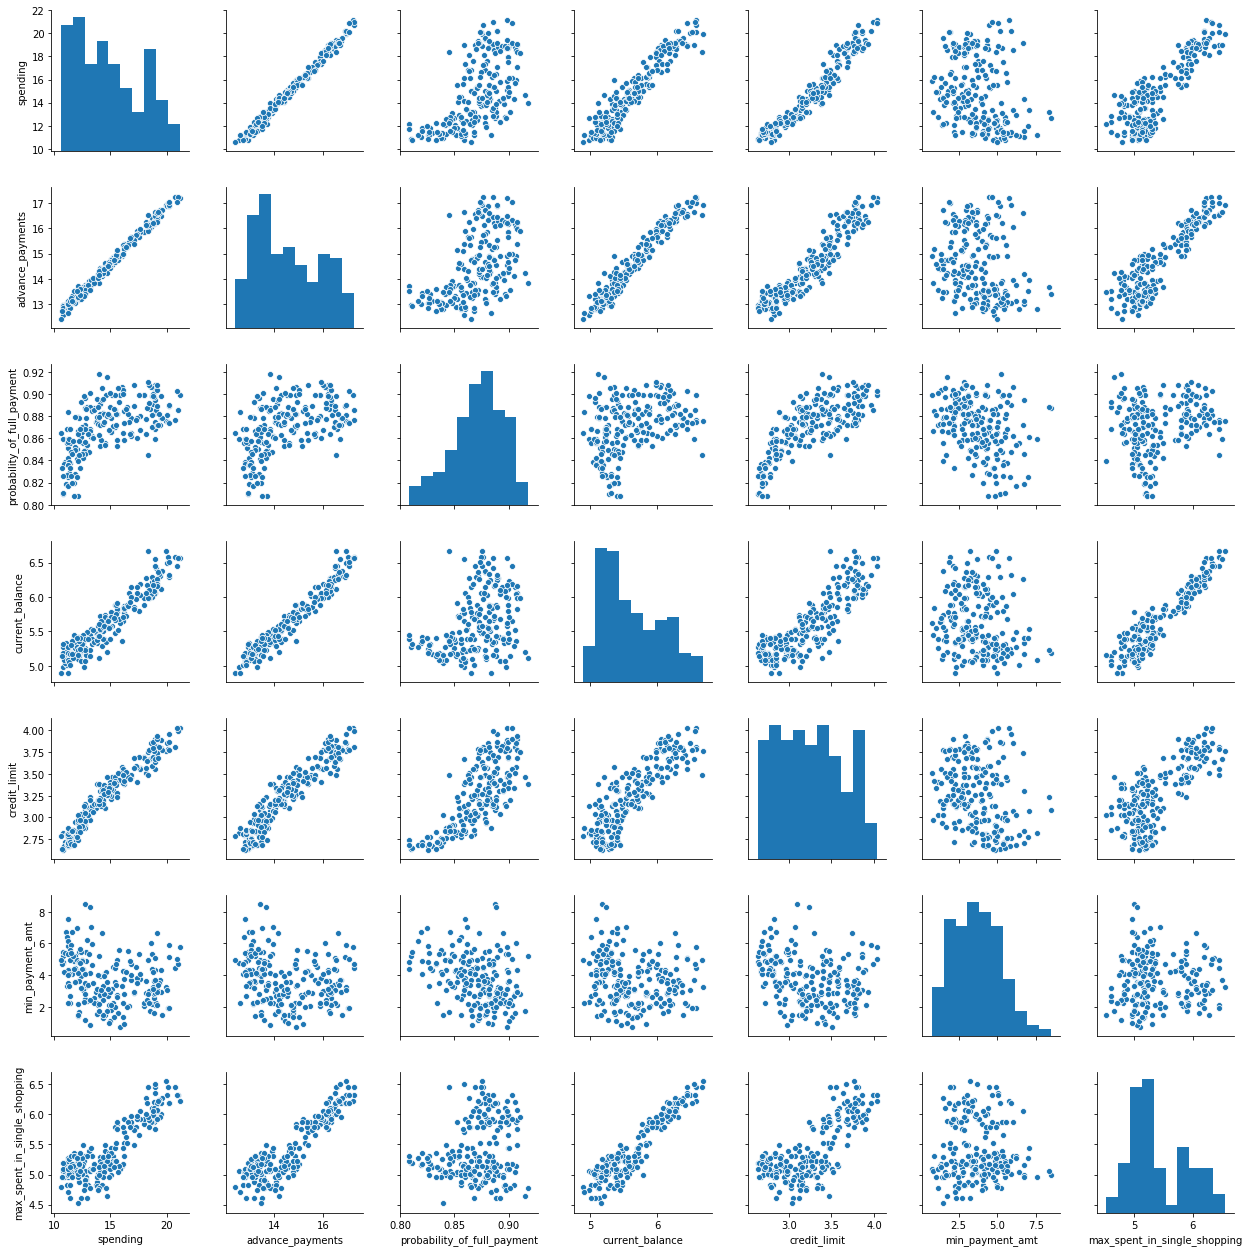

In [17]:
sns.pairplot(df)

Dataset seems to be highly correlated from the pairplot

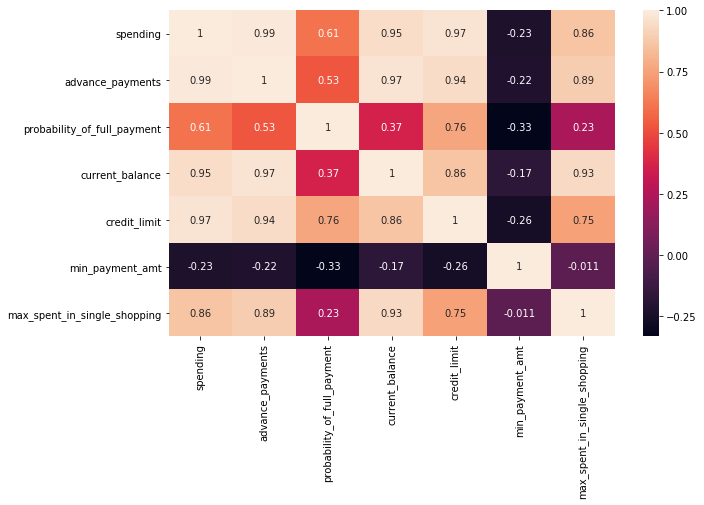

In [19]:
# Checing for co-relation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True)

Spending is highly correlated with advance_payments, current_balance,credit_limit and max_spent_in_single_shopping
<br>min_payment_amt is negatively correlated with all variables

## Scaling the Data

In [16]:
# Since some columns are in 100s and some in 1000s, it is better to scale the data for uniformity
# StandardScaler is used to scale the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scale = sc.fit_transform(df)

## Clustering

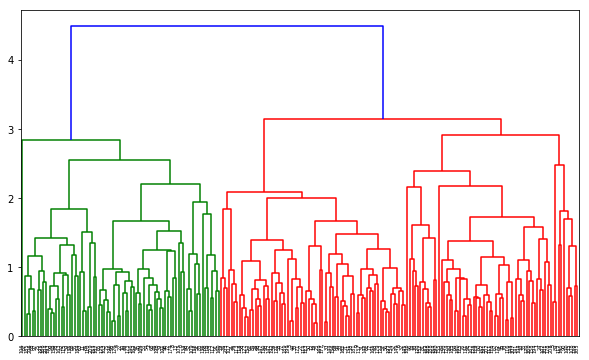

In [21]:
link_method = linkage(df_scale, method = 'average')
plt.figure(figsize=(10,6))
dend = dendrogram(link_method)

## Cutting the dendrogram with suitable clusters

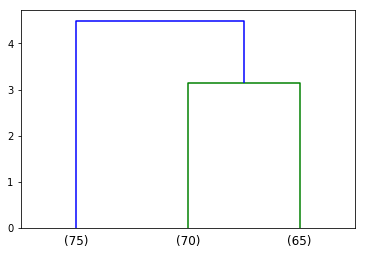

In [22]:
dend= dendrogram(link_method, truncate_mode='lastp', p=3)

In [23]:
from scipy.cluster.hierarchy import fcluster

# Set criterion as maxclust, then create 3 clusters and store the result in original dataset

fclusters = fcluster(link_method, 3, criterion = 'maxclust')
fclusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [24]:
df['fclusters']= fclusters

## Cluster Frequency

In [25]:
df.fclusters.value_counts().sort_index()

1    75
2    70
3    65
Name: fclusters, dtype: int64

## Cluster Profiling

In [26]:
aggdata = df.groupby('fclusters').mean()
aggdata['Freq_fcluster'] = df.fclusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq_fcluster
fclusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


Cluster 1 : High Spending, high advance payments, 88% probability of full payment, more current balance -> More credit limit and medium minimum payment ammount 
<br>Cluster 2 : Low spending, less advance paments, 84% probability of full payment, comparatively less current balance -> less credit limit and more minimum payment amount
<br>Cluster 3 : Medium spending, more advance payments, 88% probability of full payment, medium current balance -> more credit limit and less mininum payment amount

## K-Means

In [27]:
from sklearn.cluster import KMeans

In [29]:
k_means = KMeans(n_clusters = 3)

In [30]:
k_means.fit(df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
#within cluster sum of squares

k_means.inertia_

430.6589731513006

In [32]:
# checking within sum of squares from cluster 1 - 10

wss = []
for i in range(1,10):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scale)
    wss.append(KM.inertia_)
    
wss

[1470.0,
 659.1717544870406,
 430.6589731513006,
 371.2935481943965,
 327.4472622369584,
 288.9533468668287,
 262.66900392180446,
 240.60805251037294,
 223.98792070065818]

Within sum of squares decreases as number of clusters increase.
<br> wss decreases significantly till k=3 

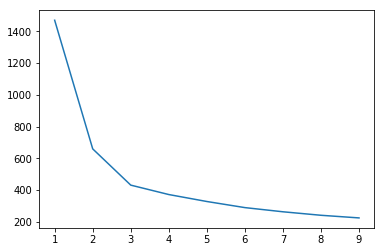

In [34]:
plt.plot(range(1,10),wss)

Elbow bend is visible at k=2 and k=3

## Silhoutte Score

In [35]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [36]:
# K-Means with k=3

k_means = KMeans(n_clusters=3)
k_means.fit(df_scale)
labels = k_means.labels_


In [37]:
silhouette_score(df_scale,labels)

0.4007270552751299

In [38]:
# K-Means with k=2

k_means = KMeans(n_clusters=2)
k_means.fit(df_scale)
labels = k_means.labels_

In [39]:
silhouette_score(df_scale,labels)

0.46577247686580914

<b>Silhoutte score is better for k=2, so we will use k as 2</b>

In [40]:
df['KMeans'] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,fclusters,KMeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


## Cluster Profiling

In [41]:
df.KMeans.value_counts().sort_index()

0    133
1     77
Name: KMeans, dtype: int64

In [43]:
df.KMeans.value_counts(normalize=True).sort_index()

0    0.633333
1    0.366667
Name: KMeans, dtype: float64

In [42]:
clust_profile = df.groupby('KMeans').mean()
clust_profile['Freq'] = df.KMeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,fclusters,Freq
KMeans,,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,2.413534,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,1.155844,77


<b>
    With K-Means, we can clearly divide the data into to groups :
    <br>
    Type 1 (Cluster 0) : This is the majority group(63%) who spend 12.9k at an average , have average current balance amount of 5k and pay 1369 in advance. This group has comparatively less credit limit(30k) and more minimum payment amount
    <br><br>
    Type 2(Cluster 1) : 36% of customers (from the given dataset) belong to this group. This is an active credit card user group with high spending (18K at an average) and make more advance payments. These customers have average current balance amount of 6k and the probability of this group to make full payments is very high (around 88%). The credit limit is 36k for this customer base and have lesser minimum pament amount.

</b>